## Proyek Analisis Data: Nama dataset
- Nama: Maryulianti
- Email: maryulianti27@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- Apa waktu atau musim di mana permintaan sewa sepeda mencapai puncaknya, dan kapan permintaan tersebut mencapai level terendah?
- Bagaimana Pengaruh cuaca terhadap total sepeda yang dirental?
- Pada hari kerja dan hari libur, pada jam berapa sepeda paling banyak disewa?

## Menyaipkan semua library yang dibuthkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

pada tahap ini mengimport kedua data yaitu day.csv dan hour.csv

In [ ]:
day = pd.read_csv('/content/day.csv')
hour = pd.read_csv('/content/hour.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data
Assesing Data "Day" dan "Hour"


In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
#Melakukan pengecekan missing value pada data "Day"
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
#Pengecekan parameter statistik data "Day"
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
#Mengecek duplikat data "Day"
print("Jumlah duplikat :", day.duplicated().sum())

Jumlah duplikat : 0


Assesing Data "Hour"

In [ ]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
print("jumlah duplikat :", hour.duplicated().sum())

jumlah duplikat : 0


Setelah melakukan tahap Assesing kedua data, tidak didapatkan missing value dan keanehan pada nilai statistik

## Cleaning Data

Menghapus kolom yang tidak diperlukan pada dataset "Day"

In [ ]:
#kedua kolom ini tidak diperlukan karena tidak dibutuhkan untuk dianalis
day_col_drop = ['windspeed', 'weekday']
day.drop(day_col_drop, axis=1, inplace=True)

day.head()

,instant,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,2,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,1,0,1,0,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,1,0,1,0,1,1,0.226957,0.229270,0.436957,82,1518,1600


Mengubah nama kolom agar mudah untuk diingat dan dianalisis

In [ ]:
day.rename(columns={
    'dteday' :'date',
    'yr' : 'year',
    'mnth':'month',
    'weathersit': 'weather',
    'cnt':'total'
}, inplace = True)

day.head()

,instant,date,season,year,month,holiday,workingday,weather,temp,atemp,hum,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,2,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,1,0,1,0,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,1,0,1,0,1,1,0.226957,0.229270,0.436957,82,1518,1600


Mapping nilai kolom berubah angka dan keterangan

Tujuannya dilakukan mapping agar mudah untuk dianalisa dan divisualisasikan



In [ ]:
#mapping kolom season
mapping_season = {
    1: 'Springer', 2: 'Summer',
    3: 'Fall', 4: 'Winter'
}
day['season'] = day['season'].map(mapping_season)


#mapping kolom year
mapping_year = {0: 2011, 1: 2012}
day['year'] = day['year'].map(mapping_year)

#mapping kolom bulan
mapping_month = {
    1: 'Jan', 2: 'Feb', 3: 'Mar',
    4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jun', 8: 'Aug', 9: 'Sep',
    10: 'Oct', 11: 'Nov', 12: 'Dec',
}
day['month'] = day['month'].map(mapping_month)

#mapping kolom cuaca
mapping_weather = {
    1: 'Clear', 2: 'Mist',
    3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'
}
day['weather'] = day['weather'].map(mapping_weather)


day.head()

,instant,date,season,year,month,holiday,workingday,weather,temp,atemp,hum,casual,registered,total
0,1,2011-01-01,Springer,2011,Jan,0,0,Mist,0.344167,0.363625,0.805833,331,654,985
1,2,2011-01-02,Springer,2011,Jan,0,0,Mist,0.363478,0.353739,0.696087,131,670,801
2,3,2011-01-03,Springer,2011,Jan,0,1,Clear,0.196364,0.189405,0.437273,120,1229,1349
3,4,2011-01-04,Springer,2011,Jan,0,1,Clear,0.200000,0.212122,0.590435,108,1454,1562
4,5,2011-01-05,Springer,2011,Jan,0,1,Clear,0.226957,0.229270,0.436957,82,1518,1600


**Memperbaiki Data**



In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   date        731 non-null    object 
 2   season      731 non-null    object 
 3   year        731 non-null    int64  
 4   month       731 non-null    object 
 5   holiday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weather     731 non-null    object 
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  total       731 non-null    int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 80.1+ KB


In [ ]:
#mengubah type data kolom date ke type data datetime
day['date']= pd.to_datetime(day['date'])

#mengubah type date beberapa kolom ke category untuk menghemat memori dan meninggkatkan efisiensi eksekusi program
day['season']= day['season'].astype('category')
day['year']= day['year'].astype('category')
day['month']= day['month'].astype('category')
day['holiday']= day['holiday'].astype('category')
day['workingday']= day['workingday'].astype('category')
day['weather'] = day['weather'].astype('category')

day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    category      
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weather     731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  total       731 non-null    int64         
dtypes: category(6), datetime64[ns](1), float64(3), int64(4)
memory usage: 51.2 KB


Membersihkan data pada dataset "Hour"
---
Menghapus beberapa kolom


In [ ]:
hour_col_drop = ['windspeed', 'weekday']
hour.drop(hour_col_drop, axis=1, inplace = True)

hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,0,1,0.24,0.2879,0.81,3,13,16
1,2,2011-01-01,1,0,1,1,0,0,1,0.22,0.2727,0.80,8,32,40
2,3,2011-01-01,1,0,1,2,0,0,1,0.22,0.2727,0.80,5,27,32
3,4,2011-01-01,1,0,1,3,0,0,1,0.24,0.2879,0.75,3,10,13
4,5,2011-01-01,1,0,1,4,0,0,1,0.24,0.2879,0.75,0,1,1


In [ ]:
#Mengubah nama pada beberapa kolom
hour.rename(columns={
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'weathersit' : 'weather',
    'cnt' : 'total'
}, inplace=True)

hour.head()

,instant,date,season,year,month,hour,holiday,workingday,weather,temp,atemp,hum,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,0,1,0.24,0.2879,0.81,3,13,16
1,2,2011-01-01,1,0,1,1,0,0,1,0.22,0.2727,0.80,8,32,40
2,3,2011-01-01,1,0,1,2,0,0,1,0.22,0.2727,0.80,5,27,32
3,4,2011-01-01,1,0,1,3,0,0,1,0.24,0.2879,0.75,3,10,13
4,5,2011-01-01,1,0,1,4,0,0,1,0.24,0.2879,0.75,0,1,1


In [ ]:
#Mapping nilai dari beberapa kolom menjadi keterangan
hour['season'] = hour['season'].map(mapping_season)
hour['year'] = hour['year'].map(mapping_year)
hour['month'] = hour['month'].map(mapping_month)
hour['weather'] = hour['weather'].map(mapping_weather)

hour.head()

,instant,date,season,year,month,hour,holiday,workingday,weather,temp,atemp,hum,casual,registered,total
0,1,2011-01-01,Springer,2011,Jan,0,0,0,Clear,0.24,0.2879,0.81,3,13,16
1,2,2011-01-01,Springer,2011,Jan,1,0,0,Clear,0.22,0.2727,0.80,8,32,40
2,3,2011-01-01,Springer,2011,Jan,2,0,0,Clear,0.22,0.2727,0.80,5,27,32
3,4,2011-01-01,Springer,2011,Jan,3,0,0,Clear,0.24,0.2879,0.75,3,10,13
4,5,2011-01-01,Springer,2011,Jan,4,0,0,Clear,0.24,0.2879,0.75,0,1,1


**Memperbaiki beberapa tipe data**


In [ ]:
#mengubah type data kolom date ke type data datetime
hour['date']= pd.to_datetime(hour['date'])

#mengubah type date beberapa kolom ke category untuk menghemat memori dan meninggkatkan efisiensi eksekusi program
hour['season']= hour['season'].astype('category')
hour['year']= hour['year'].astype('category')
hour['month']= hour['month'].astype('category')
hour['holiday']= hour['holiday'].astype('category')
hour['workingday']= hour['workingday'].astype('category')
hour['weather'] = hour['weather'].astype('category')

hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   workingday  17379 non-null  category      
 8   weather     17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  casual      17379 non-null  int64         
 13  registered  17379 non-null  int64         
 14  total       17379 non-null  int64         
dtypes: category(6), datetime64[ns](1), float64(3), int64(5)
memory usage: 

## Exploratory Data Analysis (EDA)

### Explore Dataset Day

Eksplore jumlah total rental setiap bulan


In [ ]:
day.groupby(by=['year', 'month']).agg({
    'total': ['sum', 'max', 'min', 'mean']
})

total                         
               sum   max   min         mean
year month                                 
2011 Apr     94870  5312   795  3162.333333
     Aug    136691  5895  1115  4409.387097
     Dec     87323  3940   705  2816.870968
     Feb     48215  2927  1005  1721.964286
     Jan     38189  1985   431  1231.903226
     Jun    284853  6043  3285  4669.721311
     Mar     64045  3239   605  2065.967742
     May    135821  5805  2633  4381.322581
     Nov    102167  4486  1495  3405.566667
     Oct    123511  5511   627  3984.225806
     Sep    127418  5423  1842  4247.266667
2012 Apr    174224  7460  1027  5807.466667
     Aug    214503  7865  4549  6919.451613
     Dec    123713  6606   441  3990.741935
     Feb    103137  5062  1529  3556.448276
     Jan     96744  4521  1301  3120.774194
     Jun    406437  8173  4127  6662.901639
     Mar    164875  8362  3194  5318.548387
     May    195865  8294  2843  6318.225806
     Nov    152664  6852  2277  5088.800000
     Oct    198841  8156    22  6414.225806
     Sep    218573  8714  4073  7285.766667

Berdasarkan pada hasil diatas didapatkan beberapa insight:

1.   Ditahun 2011, total penyewaan sepeda tertinggi terdapat dibulan Juni dengan jumlah 284853 unit dan penyewaan sepeda terendah terdapat dibulan Januari dengan jumlah 38189 unit
2.   Ditahun 2012, penyewaan sepeda tertinggi terdapat dibulan Juni dengan jumlah 406437 unit, dan penyewaan paling terendah terdapat dibulan Februari dengan jumlah 103137 unit


**Eksplore jumlah total rental pada setiam musim**

In [ ]:
day.groupby(by='season').agg({
    'total': ['sum', 'max', 'min', 'mean'],
    'temp' : ['mean', 'max', 'min', 'std'],
    'atemp': ['mean', 'max', 'min', 'std'],
    'hum' : ['mean', 'max', 'min', 'std'],
})

total                               temp                      \
              sum   max   min         mean      mean       max       min   
season                                                                     
Fall      1061129  8714  1115  5644.303191  0.706309  0.861667  0.469167   
Springer   471348  7836   431  2604.132597  0.297748  0.572500  0.059130   
Summer     918589  8362   795  4992.331522  0.544405  0.808333  0.253043   
Winter     841613  8555    22  4728.162921  0.422906  0.657500  0.220833   

                       atemp                                     hum  \
               std      mean       max       min       std      mean   
season                                                                 
Fall      0.070848  0.655898  0.840896  0.242400  0.072056  0.633482   
Springer  0.102735  0.296914  0.548617  0.079070  0.099026  0.582903   
Summer    0.122650  0.520307  0.757579  0.250339  0.108022  0.626948   
Winter    0.107834  0.415539  0.607975  0.227913  0.095536  0.668719   

                                        
               max       min       std  
season                                  
Fall      0.939565  0.360000  0.119349  
Springer  0.948261  0.000000  0.151880  
Summer    0.922500  0.254167  0.152841  
Winter    0.972500  0.333478  0.131248

In [ ]:
day.groupby('season')[['registered', 'casual']].sum().reset_index()

,season,registered,casual
0,Fall,835038,226091
1,Springer,410726,60622
2,Summer,715067,203522
3,Winter,711831,129782


Pada hasil diatas didapatkan beberapa insight mengenai musim

1.   Penyewaan paling banyak adalam di musim Fall dan yang paling sedikit adalah musin Springer. Hasilnya berupa rata-rata yang terbanyak terjadi dimusin Fall
2.   (Temp) Suhu Musim dari tertinggi ke terendah adalah Fall -> Summer -> Winter -> Springer
1.   (atemp) apparent temperature/Suhu yang dirasakan dari yang tertinggi ke terendah adalah Fall -> Summer -> Winter -> Springer
2.   (hum) kelembapan musim dari yang tertinggi ke terendah adalah Winter -> Fall -> Summer -> Springer

**Eksplore Cuaca terhadap Jumlah total Rental**

In [ ]:
day.groupby(by='weather').agg({
    'total': ['sum', 'max', 'min', 'mean']
})

total                        
                     sum   max  min         mean
weather                                         
Clear            2257952  8714  431  4876.786177
Light Rain/Snow    37869  4639   22  1803.285714
Mist              996858  8362  605  4035.862348

In [ ]:
day.groupby('weather')[['registered', 'casual']].sum().reset_index()

,weather,registered,casual
0,Clear,1811606,446346
1,Light Rain/Snow,33974,3895
2,Mist,827082,169776


Berdasarkan hasil diatas dapat dilihat penyewaan sepeda terbanyak terjadi saat cuaca sedang cerah dan angka penyewaannya lebih tinggi dari keadaan cuaca lainnya

### Explore Dataset Hour

Eksplore jumlah total rental tiap jam pada hari kerja


In [ ]:
filter_workingday = hour[(hour["workingday"] == 1)]
hour_workingday = filter_workingday.groupby(by='hour').agg({
    'total': ['sum', 'max', 'min', 'mean']
})
hour_workingday.columns = hour_workingday.columns.droplevel(0)
hour_workingday.sort_values(by='sum', ascending=False)

,sum,max,min,mean
hour,,,,
17,262120,976,26,525.290581
18,245129,977,26,492.226908
8,236595,839,31,477.006048
19,173504,743,18,348.401606
16,146268,634,13,293.122244
7,144144,596,18,290.612903
20,124360,567,23,249.718876
9,119793,426,23,241.518145
15,100263,601,13,201.331325


Pada hasil diatas menunjukkan bahwa pada hari kerja penyewaan sepeda terbanyak terjadi pada pagi hari di jam 08.00 dan pada sore hari antara jam 17.00 - 18.00

In [ ]:
filter_holiday = hour[(hour["holiday"] == 1)|(hour["workingday"] == 0)]
hour_holiday = filter_holiday.groupby(by='hour').agg({
    'total': ['sum', 'max', 'min', 'mean']
})
hour_holiday.columns = hour_holiday.columns.droplevel(0)
hour_holiday.sort_values(by='sum', ascending=False)

,sum,max,min,mean
hour,,,,
13,86101,760,30,372.731602
12,84606,776,32,366.259740
14,84233,750,23,364.645022
15,82886,750,7,358.813853
16,81480,783,11,352.727273
17,74740,731,15,323.549784
11,72838,663,27,315.316017
18,64643,676,23,281.056522
10,59115,539,12,255.909091


Berdasarkan hasi diatas penyewaan sepeda pada hari libur di 2 tahun terakhir menunjukkan bahwa total penyewaan terbanyak terjadi saat siang hari sampai sore hari di jam 12.00 - 16.00

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa waktu atau musim di mana permintaan sewa sepeda mencapai puncaknya, dan kapan permintaan tersebut mencapai level terendah?

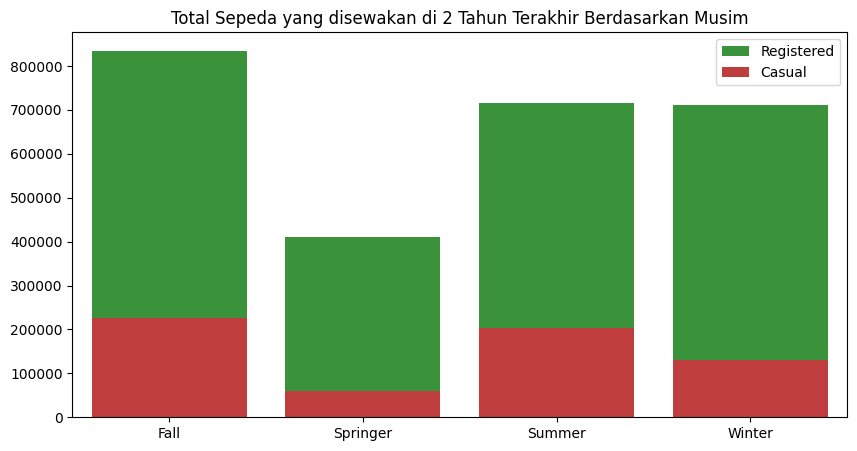

In [ ]:
#membuat variabel total data pelanggan registered dan casual setiap season
plot_season = day.groupby('season')[['registered', 'casual']].sum().reset_index()

#membuat bar chart
plt.figure(figsize = (10, 5))
sns.barplot(
    data=plot_season,
    x='season',
    y='registered',
    label = 'Registered',
    color = 'tab:green'
)
sns.barplot(
    data=plot_season,
    x='season',
    y='casual',
    label='Casual',
    color ='tab:red'
)
plt.title('Total Sepeda yang disewakan di 2 Tahun Terakhir Berdasarkan Musim')
plt.xlabel(None)
plt.ylabel(None)
plt.legend()
plt.show()

Pada Gambar visualisasi bar chart diatas dapat dilihat bahwa penyewaan sepeda terjadi pada musim Fall, baik untuk pelanggan Registered maupun Casual dan yang paling rendah dalam penyewaan sepeda adalah musim Springer

### Pertanyaan 2: Bagaimana Pengaruh cuaca terhadap total sepeda yang dirental?

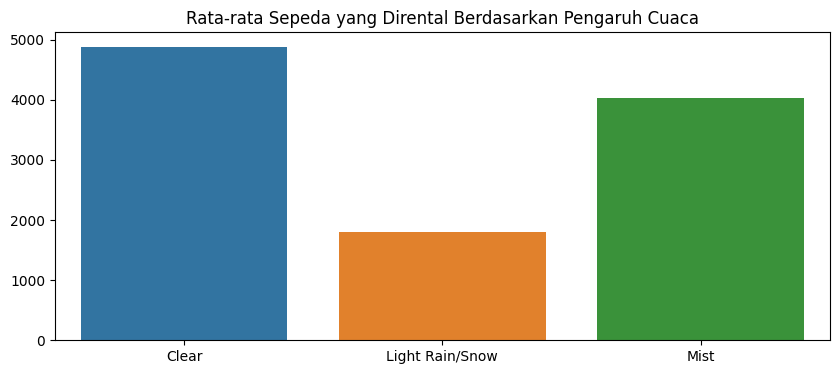

In [ ]:
#Membuat Variabel total data pelanggan berdasarkan cuaca
plot_weather = day.groupby(by='weather').agg({'total' : 'mean'}).reset_index()

#membuat bar chart
plt.figure(figsize=(10,4))
sns.barplot(
    data=plot_weather,
    x='weather',
    y='total'
)
plt.title('Rata-rata Sepeda yang Dirental Berdasarkan Pengaruh Cuaca')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Pada hasil bar chart diatas dapat dilihat bahwa pada cuaca Clear/Cerah memiliki rata-rata penyewaan paling banyak dan yang paling sedikit penyewaan sepeda berdasarkan kondisi cuaca adalah Light Rain/Snow. Hal ini terbukti bahwa jumlah penyewaan sepeda berpengaruh pada kondisi cuaca.

### Pertanyaan 3: Pada hari kerja dan hari libur, pada jam berapa sepeda paling banyak disewa?


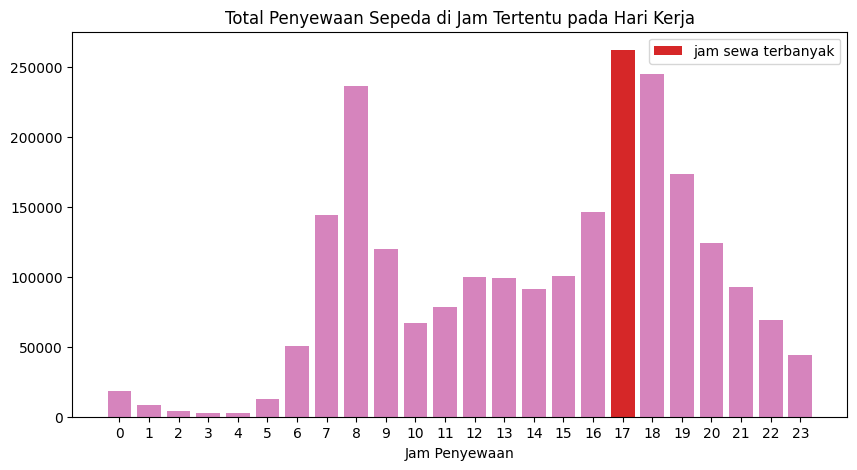

In [ ]:
#Membuat variabek total data pelanggan berdasarkan jam kerja
plot_hour_workingday = filter_workingday.groupby(by='hour').agg({
    'total': 'sum'
}).reset_index()

#Menentukan index kolom dengan total terbesar
max_col = plot_hour_workingday['total'].idxmax()

#Membuat bar plot
plt.figure(figsize=(10,5))
sns.barplot(
    data=plot_hour_workingday,
    x='hour',
    y='total',
    color = 'tab:pink'
)
plt.bar(max_col, plot_hour_workingday.loc[max_col, 'total'], color='tab:red', label='jam sewa terbanyak')

plt.title('Total Penyewaan Sepeda di Jam Tertentu pada Hari Kerja')
plt.xlabel('Jam Penyewaan')
plt.ylabel(None)
plt.legend()
plt.show()

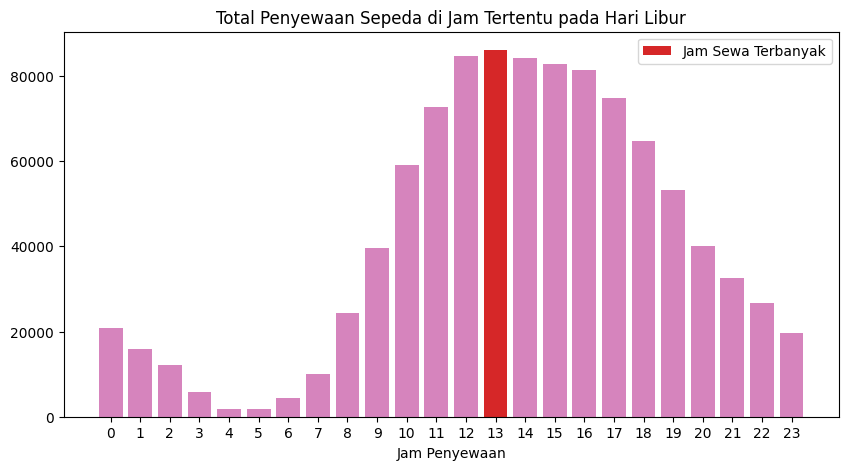

In [ ]:
#membuat variabel total data pelanggan berdasarkan jam pada hari libur
plot_hour_holiday = filter_holiday.groupby(by='hour').agg({
    'total': 'sum'
}).reset_index()

plt.figure(figsize=(10, 5))

# Menentukan indeks kolom dengan total terbesar
max_col = plot_hour_holiday['total'].idxmax()

# Membuat bar plot
sns.barplot(
    data=plot_hour_holiday,
    x='hour',
    y='total',
    color='tab:pink'
)
plt.bar(max_col, plot_hour_holiday.loc[max_col, 'total'], color='tab:red', label='Jam Sewa Terbanyak')

plt.title("Total Penyewaan Sepeda di Jam Tertentu pada Hari Libur")
plt.xlabel('Jam Penyewaan')
plt.ylabel(None)
plt.legend()
plt.show()

Dari 2 gambar Visualisasi diatas dapat dilihat bahwa jam penyewaan terbanyak pada hari kerja terjadi di jam 17.00. Sedangkan pada hari libur, penyewaan sepeda terbanyak di jam 13.00 siang

## Conclusion

- Conclution pertanyaan 1 :Penyewaan terbanyak berdasarkan musim adalah musin Fall dan yang paling sedikit yaitu pada musim Springer
- conclution pertanyaan 2 : Cuaca sangat mempengaruhi jumlah penyewaan sepeda. Pelanggan lebih memilih melakukan penyewaan saat cuaca sedan cerah/clear.
- conclution pertanyaan 3 : Pada hari kerja penyewaan sepeda paling banyak dilakukan dijam 17.00. Sedangkan pada hari libur penyewaan dilakukan di jam 13.00 siang

# Menerapkan Teknik Analisis Lanjutan

**RFM Analysis**

In [ ]:
rfm_df = hour.groupby(by="hour", as_index=False).agg({
    "date": "max",
    "instant": "nunique",
    "total": "sum"
})

# mengganti nama kolom
rfm_df.columns = ["hour", "last_order_date", "order_count", "revenue"]

# perhitungan recency per hari
rfm_df["last_order_date"] = rfm_df["last_order_date"].dt.date
recent_date = hour["date"].dt.date.max()
rfm_df["recency"] = rfm_df["last_order_date"].apply(lambda x: (recent_date - x).days)

# Drop kolom 'last_order_date'
rfm_df.drop("last_order_date", axis=1, inplace=True)

rfm_df.head()

,hour,order_count,revenue,recency
0,0,726,39130,0
1,1,724,24164,0
2,2,715,16352,0
3,3,697,8174,0
4,4,697,4428,0


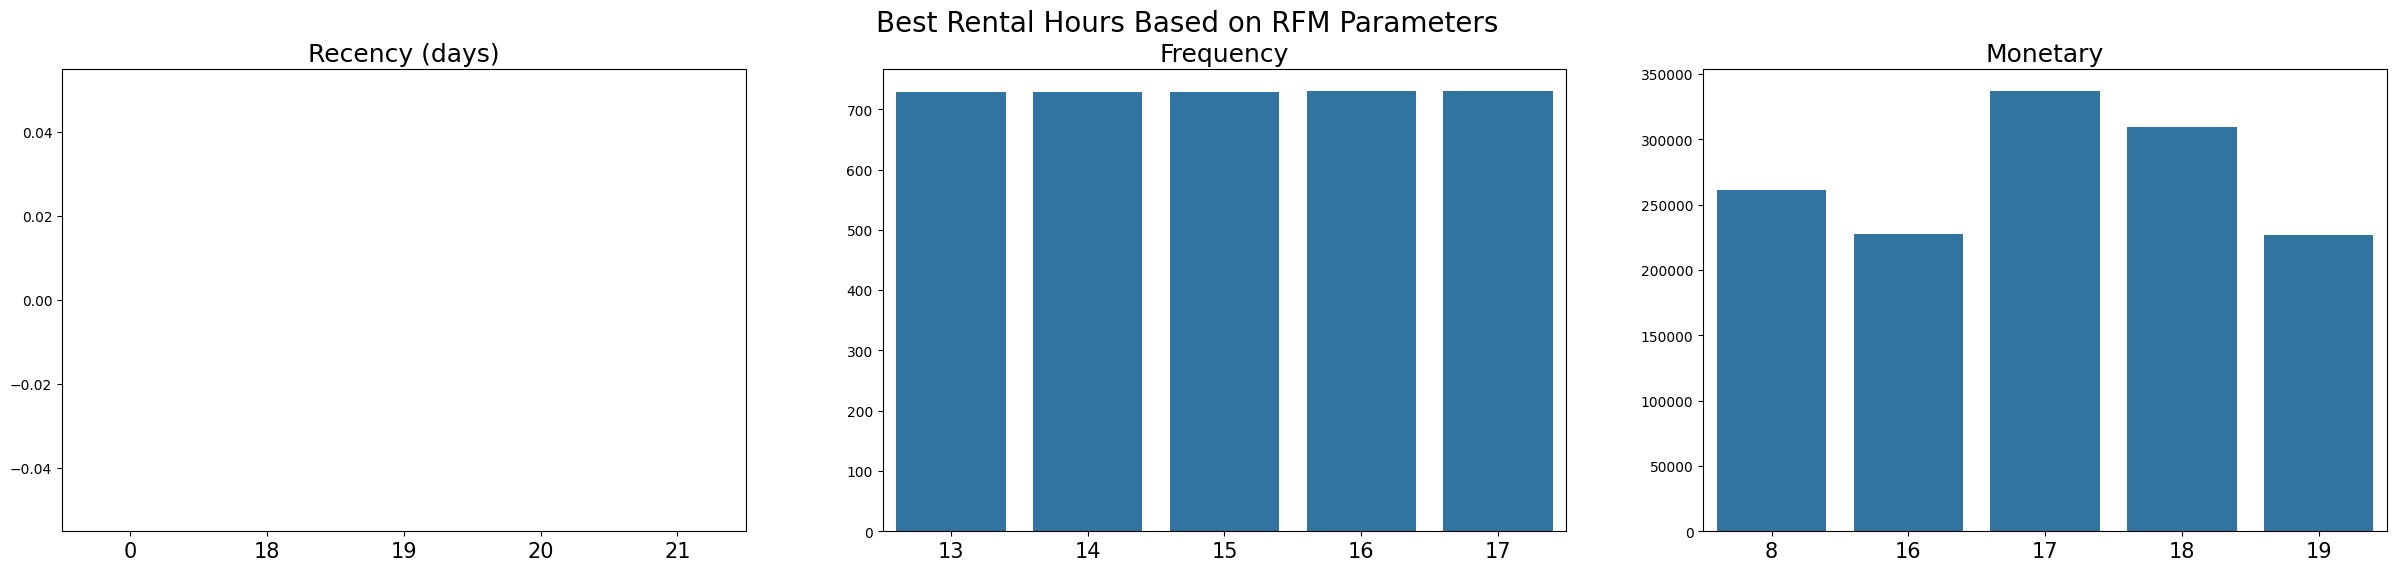

In [ ]:
top_recency = rfm_df.sort_values(by="recency", ascending=True).head(5)
top_frequency = rfm_df.sort_values(by="order_count", ascending=False).head(5)
top_monetary = rfm_df.sort_values(by="revenue", ascending=False).head(5)

#membuat bar plot RFM
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

#plot top recency
sns.barplot(
    data=top_recency,
    x="hour",
    y="recency",
    color='tab:blue',
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

#plot top frequency
sns.barplot(
    data=top_frequency,
    x="hour",
    y="order_count",
    color='tab:blue',
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

#plot top monetary
sns.barplot(
    data=top_monetary,
    x="hour",
    y="revenue",
    color='tab:blue',
    ax=ax[2]
)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Rental Hours Based on RFM Parameters", fontsize=20)
plt.show()

RFM Analysis digunakan untuk mencari top 5 hours berdasarkan 3 kategori yang berbeda dengan memanfaatkan nilai pada kolom jam. Kategori Recency didasarkan pada transaksi terbaru yang dilakukan pada jam tertentu. Frekuensi menunjukkan seberapa sering terjadi transaksi. Sedangkan kategori Monetary menunjukkan seberapa banyak transaksi yang terjadi pada jam tertentu.

In [ ]:
hour.to_csv("all_data.csv", index=False)